<a href="https://colab.research.google.com/github/AbhiGhadi/Kuramoto_Oscillators/blob/main/Kuramoto_oscillatior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Synchronization of Kuramoto Oscillator


In [12]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt 
import matplotlib.pyplot as patches
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import time 
import matplotlib.animation as animation
from IPython import display
import networkx as nx
import pandas as pd

-Number Of Oscillators is 'N'

-Randomly Assigning Values for natural Frequency($ω$) between 0 to 10

-The probability of a Network of Couplingis ‘p’, i.e p = 1 for All to All coupling and p = 0 for no coupling


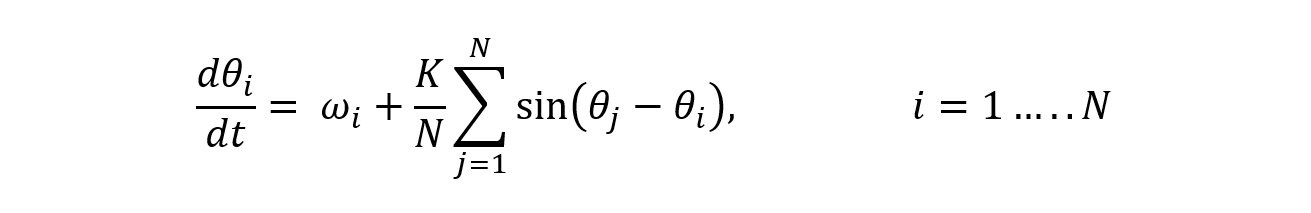

In [25]:
N = 50                                          # Number of Oscillators
omega = [0] *N
for i in range (N):
  omega[i]= 10*np.random.rand()
rand_network = nx.erdos_renyi_graph(n=N, p=0.7) # p=1 -> all-to-all connectivity
randomize_coupling= nx.to_numpy_array(rand_network)

- Coupling Strenght is K

- Randomly Assigning Values for Initial theta($Θ$) between $-π$ to $π$

In [26]:
K = 15                                          # Coupling Strenght
def dSdt(S, t):
     theta = [0] * N          
     theta_dot = [0]* N   

     for i in range (N):
         theta[i] = S[i]   
            
     for i in range (N):
       SUM=0
       for j in range(N):
         SUM = SUM + randomize_coupling[i,j]*np.sin(theta[j]-theta[i])
       theta_dot[i] = omega[i] +(K/N)* (SUM)
     return theta_dot

S_0 = [0]* N
for i in range (N):
   S_0[i]= np.random.choice([-1,1])*np.pi*np.random.rand()  

Solving Differential Equation with 'ODEINT' function

In [29]:
t = np.linspace(0, 5, 1000)
sol = odeint(dSdt, y0=S_0, t = t)

# Plotting of Graphs

Plotting $\sin\theta$ vs $time$ to see the Synchronization

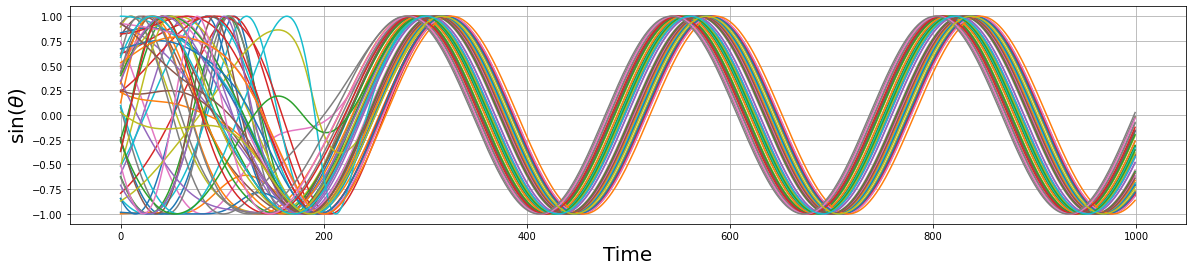

In [35]:
sol = sol.T 
_, ax = plt.subplots(figsize=(20, 4))
ax.plot(np.sin(sol.T))
ax.set_xlabel('Time', fontsize=20)
ax.set_ylabel(r'$\sin(\theta)$', fontsize=20)
plt.grid()

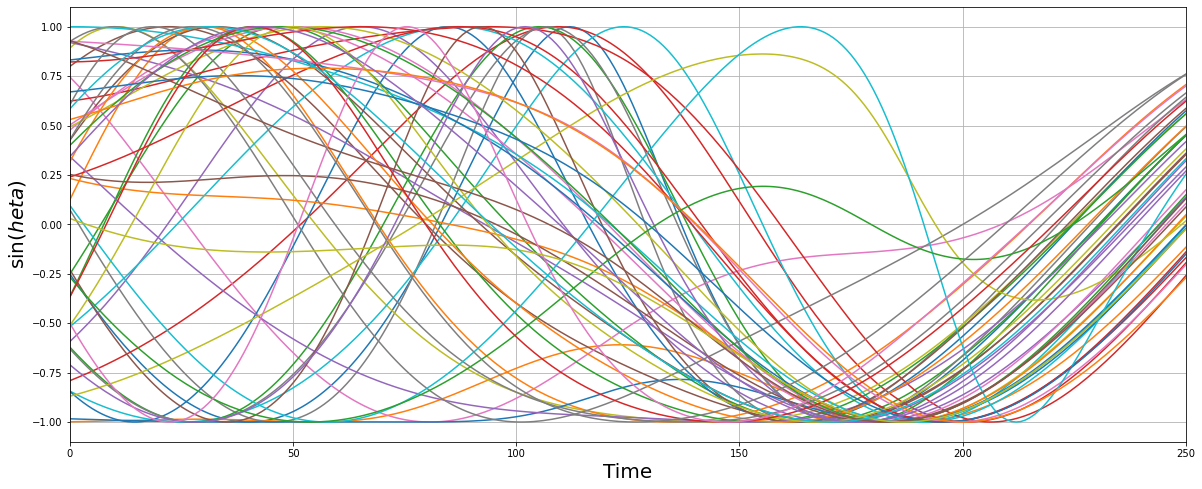

In [41]:
sol = sol.T
_, ax = plt.subplots(figsize=(20, 8))
ax.plot(np.sin(sol.T))
ax.set_xlabel('Time', fontsize=20)
ax.set_ylabel('$\sin(\theta)$', fontsize=20)
plt.xlim(0,250)
plt.grid()

Plotting $\sinΘ$ vs $\cosΘ$ with perticular time frame

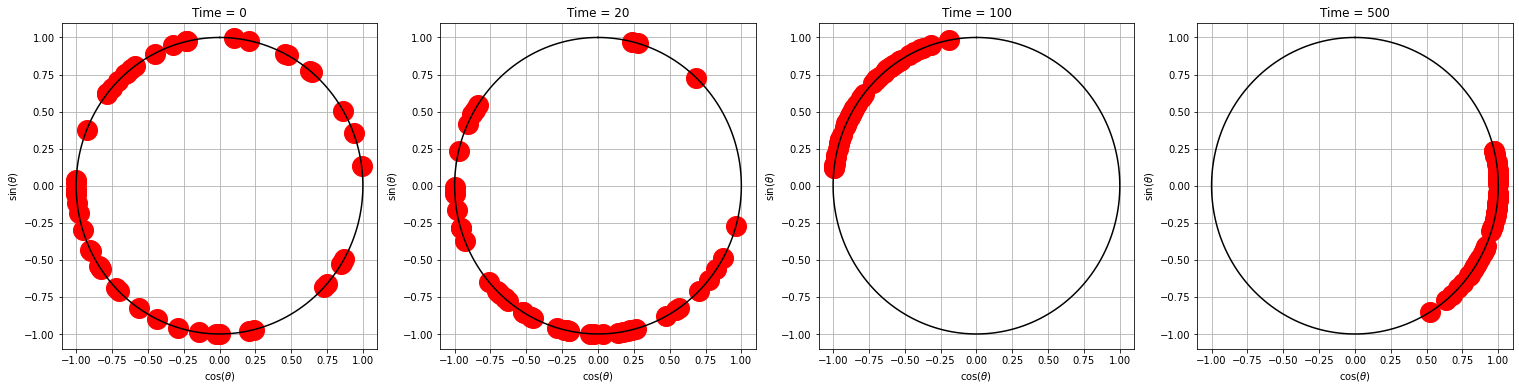

In [20]:
fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(26, 6),
                         subplot_kw={
                             "ylim": (-1.1, 1.1),
                             "xlim": (-1.1, 1.1),
                             "xlabel": r'$\cos(\theta)$',
                             "ylabel": r'$\sin(\theta)$',
                         })

times = [0,20, 100, 500]
circle_x = np.sin(np.linspace(0,2*np.pi , 200))
circle_y = np.cos(np.linspace(0,2*np.pi , 200))

for ax, time in zip(axes, times):
    ax.grid()
    ax.plot(np.cos(sol[:, time]),
            np.sin(sol[:, time]),
            'o',color = 'red', markersize=20)
    ax.plot(circle_x,circle_y,'-',color ='black',markersize =0.5)
    ax.set_title(f'Time = {time}')

# Animation of the Phase Trasition

To watch Animation, Please open code in Colab

In [21]:
plt.rcParams['figure.figsize'] = [10, 10]
fig = plt.figure()
axis = plt.axes(xlim=(-2, 2), ylim=(-2, 2))
line=[0]*N
for i in range(N):
  line[i], = axis.plot(0, 0,'o',markersize =15)

plt.grid()
plt.plot(circle_x,circle_y,'-',color ='black',markersize =0.5)
def animate(frame_number):
  x =[0]*N
  y =[0]*N
  for i in range(N):
    x[i] = np.cos(sol[i,frame_number])
    y[i] = np.sin(sol[i,frame_number])
    line[i].set_data(x[i], y[i])
 
  return line

anim = animation.FuncAnimation(fig, animate, frames=500, interval=200, blit =True)
video = anim.to_html5_video()
  
# embedding for the video
html = display.HTML(video)
  
# draw the animation
display.display(html)
plt.close()

In [22]:
print(sol.shape)
print(sol)

(50, 1000)
[[-2.16952021 -2.07716728 -1.98649837 ... 53.10390148 53.15977046
  53.21563944]
 [-1.71689046 -1.71203124 -1.70745352 ... 52.43063086 52.48649984
  52.54236882]
 [-3.02636847 -2.98015251 -2.93393557 ... 52.5905026  52.64637158
  52.70224057]
 ...
 [-2.572367   -2.56643694 -2.5590865  ... 52.36477298 52.42064197
  52.47651095]
 [ 2.42252567  2.45960746  2.49793926 ... 58.60705478 58.66292376
  58.71879274]
 [ 2.27284154  2.35345985  2.4346334  ... 59.09490477 59.15077376
  59.20664274]]
